In [1]:
import pandas as pd
import numpy as np
import nltk
import gensim
import re
import matplotlib.pyplot as plt
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from wordcloud import WordCloud
np.random.seed(400)
from pprint import pprint
# nltk.download
#nltk.download('wordnet')
#nltk.download('stopwords')

In [2]:
df = pd.read_csv('inshort_news_data-1.csv')
test_df = pd.read_csv('inshort_news_data-2.csv')
df.head(20)

,Unnamed: 0,news_headline,news_article,news_category
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology
5,5,Parliamentary panel divided over key issues in...,The members of the Joint Parliamentary Committ...,technology
6,6,"Google, Facebook sign French govt's 'Tech for ...","Google CEO Sundar Pichai, Facebook CEO Mark Zu...",technology
7,7,Facebook could soon face its 1st antitrust sui...,Facebook could soon face the first antitrust a...,technology
8,8,Canada plans digital tax on tech majors like F...,Canada's Finance Department on Monday said it ...,technology
9,9,Twitter's 'Audio Spaces' to include transcript...,"Twitter's ""Audio Spaces"", that will allow user...",technology


In [4]:
df_clean = pd.DataFrame()
df_clean['news_article'] = df.news_article.str.lower()
df_clean['news_headline'] = df.news_headline.str.lower()
df_clean.insert(0, 'Id', range(1, 1 + len(df_clean)))



df_clean_test = pd.DataFrame()
df_clean_test['news_article'] = test_df.news_article.str.lower()
df_clean_test['news_headline'] = test_df.news_headline.str.lower()
df_clean_test.insert(0, 'Id', range(1, 1 + len(df_clean_test)))



df_clean.head(20)

,Id,news_article,news_headline
0,1,deepmind's ai system 'alphafold' has been reco...,50-year-old problem of biology solved by artif...
1,2,microsoft teams will stop working on internet ...,microsoft teams to stop working on internet ex...
2,3,"china, in response to reports of us adding chi...",hope us won't erect barriers to cooperation: c...
3,4,the global smartphone sales in the third quart...,global smartphone sales in q3 falls 5.7% to 36...
4,5,the european union (eu) is hoping that us pres...,eu hoping biden will clarify us position on di...
5,6,the members of the joint parliamentary committ...,parliamentary panel divided over key issues in...
6,7,"google ceo sundar pichai, facebook ceo mark zu...","google, facebook sign french govt's 'tech for ..."
7,8,facebook could soon face the first antitrust a...,facebook could soon face its 1st antitrust sui...
8,9,canada's finance department on monday said it ...,canada plans digital tax on tech majors like f...
9,10,"twitter's ""audio spaces"", that will allow user...",twitter's 'audio spaces' to include transcript...


In [5]:
df_clean.news_article = df_clean.news_article.apply(lambda x: re.sub(r"[\,\.\'\"\`]", '', x))
df_clean.news_headline = df_clean.news_headline.apply(lambda x: re.sub(r"[\,\.\'\"\`]", '', x))



df_clean_test.news_article = df_clean_test.news_article.apply(lambda x: re.sub(r"[\,\.\'\"\`]", '', x))
df_clean_test.news_headline = df_clean_test.news_headline.apply(lambda x: re.sub(r"[\,\.\'\"\`]", '', x))

In [6]:
tknzr = TweetTokenizer()
df_clean['article_tokens'] = df_clean['news_article'].apply(tknzr.tokenize)
df_clean['headline_tokens'] = df_clean['news_headline'].apply(tknzr.tokenize)



df_clean_test['article_tokens'] = df_clean_test['news_article'].apply(tknzr.tokenize)
df_clean_test['headline_tokens'] = df_clean_test['news_headline'].apply(tknzr.tokenize)



df_clean.head(20)

,Id,news_article,news_headline,article_tokens,headline_tokens
0,1,deepminds ai system alphafold has been recogni...,50-year-old problem of biology solved by artif...,"[deepminds, ai, system, alphafold, has, been, ...","[50, -, year-old, problem, of, biology, solved..."
1,2,microsoft teams will stop working on internet ...,microsoft teams to stop working on internet ex...,"[microsoft, teams, will, stop, working, on, in...","[microsoft, teams, to, stop, working, on, inte..."
2,3,china in response to reports of us adding chin...,hope us wont erect barriers to cooperation: ch...,"[china, in, response, to, reports, of, us, add...","[hope, us, wont, erect, barriers, to, cooperat..."
3,4,the global smartphone sales in the third quart...,global smartphone sales in q3 falls 57% to 366...,"[the, global, smartphone, sales, in, the, thir...","[global, smartphone, sales, in, q3, falls, 57,..."
4,5,the european union (eu) is hoping that us pres...,eu hoping biden will clarify us position on di...,"[the, european, union, (, eu, ), is, hoping, t...","[eu, hoping, biden, will, clarify, us, positio..."
5,6,the members of the joint parliamentary committ...,parliamentary panel divided over key issues in...,"[the, members, of, the, joint, parliamentary, ...","[parliamentary, panel, divided, over, key, iss..."
6,7,google ceo sundar pichai facebook ceo mark zuc...,google facebook sign french govts tech for goo...,"[google, ceo, sundar, pichai, facebook, ceo, m...","[google, facebook, sign, french, govts, tech, ..."
7,8,facebook could soon face the first antitrust a...,facebook could soon face its 1st antitrust sui...,"[facebook, could, soon, face, the, first, anti...","[facebook, could, soon, face, its, 1st, antitr..."
8,9,canadas finance department on monday said it p...,canada plans digital tax on tech majors like f...,"[canadas, finance, department, on, monday, sai...","[canada, plans, digital, tax, on, tech, majors..."
9,10,twitters audio spaces that will allow users to...,twitters audio spaces to include transcription...,"[twitters, audio, spaces, that, will, allow, u...","[twitters, audio, spaces, to, include, transcr..."


In [7]:
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [(lemmatizer.lemmatize(w)) for w in text]

In [8]:
df_clean['lemmatized_article_tokens'] = df_clean['article_tokens'].apply(lemmatize_text)
df_clean['lemmatized_headline_tokens'] = df_clean['headline_tokens'].apply(lemmatize_text)

df_clean_test['lemmatized_article_tokens'] = df_clean_test['article_tokens'].apply(lemmatize_text)
df_clean_test['lemmatized_headline_tokens'] = df_clean_test['headline_tokens'].apply(lemmatize_text)



df_clean[['article_tokens','lemmatized_article_tokens']].head(20)

,article_tokens,lemmatized_article_tokens
0,"[deepminds, ai, system, alphafold, has, been, ...","[deepminds, ai, system, alphafold, ha, been, r..."
1,"[microsoft, teams, will, stop, working, on, in...","[microsoft, team, will, stop, working, on, int..."
2,"[china, in, response, to, reports, of, us, add...","[china, in, response, to, report, of, u, addin..."
3,"[the, global, smartphone, sales, in, the, thir...","[the, global, smartphone, sale, in, the, third..."
4,"[the, european, union, (, eu, ), is, hoping, t...","[the, european, union, (, eu, ), is, hoping, t..."
5,"[the, members, of, the, joint, parliamentary, ...","[the, member, of, the, joint, parliamentary, c..."
6,"[google, ceo, sundar, pichai, facebook, ceo, m...","[google, ceo, sundar, pichai, facebook, ceo, m..."
7,"[facebook, could, soon, face, the, first, anti...","[facebook, could, soon, face, the, first, anti..."
8,"[canadas, finance, department, on, monday, sai...","[canada, finance, department, on, monday, said..."
9,"[twitters, audio, spaces, that, will, allow, u...","[twitter, audio, space, that, will, allow, use..."


In [9]:
stop_words = set(stopwords.words('english'))
df_clean['article_final_tokens'] = df_clean['lemmatized_article_tokens'].apply(lambda x: [item for item in x if item not in stop_words])
df_clean['headline_final_tokens'] = df_clean['lemmatized_headline_tokens'].apply(lambda x: [item for item in x if item not in stop_words])




df_clean_test['article_final_tokens'] = df_clean_test['lemmatized_article_tokens'].apply(lambda x: [item for item in x if item not in stop_words])
df_clean_test['headline_final_tokens'] = df_clean_test['lemmatized_headline_tokens'].apply(lambda x: [item for item in x if item not in stop_words])

In [10]:
df_clean[['article_tokens','article_final_tokens','headline_tokens','headline_final_tokens']].head(20)

,article_tokens,article_final_tokens,headline_tokens,headline_final_tokens
0,"[deepminds, ai, system, alphafold, has, been, ...","[deepminds, ai, system, alphafold, ha, recogni...","[50, -, year-old, problem, of, biology, solved...","[50, -, year-old, problem, biology, solved, ar..."
1,"[microsoft, teams, will, stop, working, on, in...","[microsoft, team, stop, working, internet, exp...","[microsoft, teams, to, stop, working, on, inte...","[microsoft, team, stop, working, internet, exp..."
2,"[china, in, response, to, reports, of, us, add...","[china, response, report, u, adding, chinese, ...","[hope, us, wont, erect, barriers, to, cooperat...","[hope, u, wont, erect, barrier, cooperation, :..."
3,"[the, global, smartphone, sales, in, the, thir...","[global, smartphone, sale, third, quarter, 202...","[global, smartphone, sales, in, q3, falls, 57,...","[global, smartphone, sale, q3, fall, 57, %, 36..."
4,"[the, european, union, (, eu, ), is, hoping, t...","[european, union, (, eu, ), hoping, u, preside...","[eu, hoping, biden, will, clarify, us, positio...","[eu, hoping, biden, clarify, u, position, digi..."
5,"[the, members, of, the, joint, parliamentary, ...","[member, joint, parliamentary, committee, divi...","[parliamentary, panel, divided, over, key, iss...","[parliamentary, panel, divided, key, issue, da..."
6,"[google, ceo, sundar, pichai, facebook, ceo, m...","[google, ceo, sundar, pichai, facebook, ceo, m...","[google, facebook, sign, french, govts, tech, ...","[google, facebook, sign, french, govts, tech, ..."
7,"[facebook, could, soon, face, the, first, anti...","[facebook, could, soon, face, first, antitrust...","[facebook, could, soon, face, its, 1st, antitr...","[facebook, could, soon, face, 1st, antitrust, ..."
8,"[canadas, finance, department, on, monday, sai...","[canada, finance, department, monday, said, pl...","[canada, plans, digital, tax, on, tech, majors...","[canada, plan, digital, tax, tech, major, like..."
9,"[twitters, audio, spaces, that, will, allow, u...","[twitter, audio, space, allow, user, gather, d...","[twitters, audio, spaces, to, include, transcr...","[twitter, audio, space, include, transcription..."


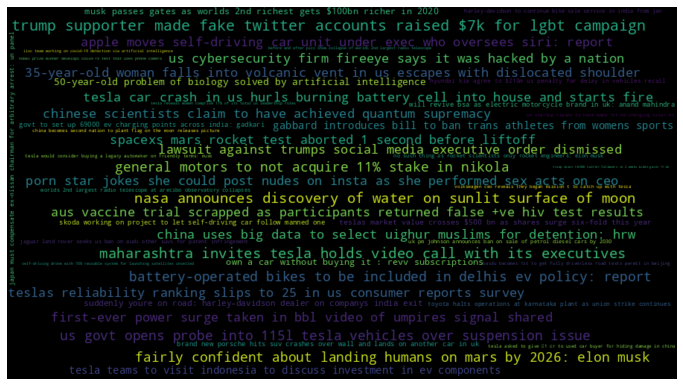

In [11]:
#Frequency of words
fdist = FreqDist(df_clean['news_headline'])
#WordCloud
wc = WordCloud(width=900, height=500, max_words=50).generate_from_frequencies(fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
processed_docs = df_clean['article_final_tokens']
processed_docs_test = df_clean_test['article_final_tokens']
training_data = processed_docs[:]
testing_data = processed_docs_test[:]

In [13]:
len(df.index)

4817

In [14]:
dictionary = gensim.corpora.Dictionary(training_data)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 3d
1 50
2 ai
3 alphafold
4 atom
5 biological
6 biology
7 challenge
8 complex
9 deepmind
10 deepminds


In [15]:
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)

In [16]:
bow_corpus_training = [dictionary.doc2bow(doc) for doc in training_data]

In [17]:
bow_corpus_testing = [dictionary.doc2bow(doc) for doc in testing_data]

In [18]:
'''
Preview BOW for our sample preprocessed document
'''
document_num = 20
bow_doc_x = bow_corpus_training[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 42 ("defence") appears 1 time.
Word 56 ("%") appears 1 time.
Word 142 ("could") appears 1 time.
Word 154 ("$") appears 1 time.
Word 190 ("20") appears 1 time.
Word 296 ("platform") appears 1 time.
Word 324 ("believe") appears 1 time.
Word 325 ("best") appears 1 time.
Word 326 ("brother") appears 1 time.
Word 327 ("due") appears 1 time.
Word 328 ("increasing") appears 1 time.
Word 329 ("investor") appears 1 time.
Word 330 ("number") appears 1 time.
Word 331 ("price") appears 1 time.
Word 332 ("store") appears 1 time.
Word 333 ("trade") appears 1 time.
Word 334 ("value") appears 1 time.


In [19]:
lda_model =  gensim.models.LdaMulticore(bow_corpus_training, 
                                   num_topics = 6, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 4)

In [20]:
pprint(lda_model.print_topics())

[(0,
  '0.014*"minister" + 0.013*"government" + 0.011*"farmer" + 0.011*"bjp" + '
  '0.010*"congress" + 0.009*"delhi" + 0.009*"leader" + 0.009*"party" + '
  '0.009*"state" + 0.007*"cm"'),
 (1,
  '0.026*"film" + 0.013*"actor" + 0.010*"actress" + 0.007*"world" + '
  '0.007*"time" + 0.006*"upcoming" + 0.006*"day" + 0.006*"like" + '
  '0.006*"coronavirus" + 0.006*"president"'),
 (2,
  '0.013*"19" + 0.012*"covid" + 0.011*"%" + 0.010*"company" + 0.008*"case" + '
  '0.008*"vaccine" + 0.007*"reported" + 0.007*"country" + 0.006*"two" + '
  '0.006*"$"'),
 (3,
  '0.012*"user" + 0.009*"new" + 0.009*"facebook" + 0.008*"company" + '
  '0.007*"video" + 0.006*"apple" + 0.006*"google" + 0.006*"$" + '
  '0.006*"feature" + 0.005*"app"'),
 (4,
  '0.018*"vaccine" + 0.013*"19" + 0.012*"covid" + 0.008*"positive" + '
  '0.008*"wrote" + 0.007*"coronavirus" + 0.007*"tested" + 0.006*"actor" + '
  '0.006*"!" + 0.006*"trial"'),
 (5,
  '0.019*"australia" + 0.013*"match" + 0.012*"team" + 0.010*"captain" + '
  '0.010*

In [21]:
def print_model(model):
    
    def print_topic(topic):
        topic_no, topic_repr = topic
        parts = topic_repr.split("+")
        words = [re.search('"(.*)"', part).group(1) for part in parts]
        return "{}: {}".format(topic_no, words)
    
    for topic in model.print_topics():
        print(print_topic(topic))
        
    
print_model(lda_model)

0: ['minister', 'government', 'farmer', 'bjp', 'congress', 'delhi', 'leader', 'party', 'state', 'cm']
1: ['film', 'actor', 'actress', 'world', 'time', 'upcoming', 'day', 'like', 'coronavirus', 'president']
2: ['19', 'covid', '%', 'company', 'case', 'vaccine', 'reported', 'country', 'two', '$']
3: ['user', 'new', 'facebook', 'company', 'video', 'apple', 'google', '$', 'feature', 'app']
4: ['vaccine', '19', 'covid', 'positive', 'wrote', 'coronavirus', 'tested', 'actor', '!', 'trial']
5: ['australia', 'match', 'team', 'captain', 'run', 'kohli', 'series', 'virat', 't20i', 'odi']


In [22]:
topic_mapping = {
    0: "Politics",
    1: "Entertainment",
    2: "Buisness",
    3: "Technology",
    4: "Covid 19",
    5: "Sports"
}

In [23]:
document_num = 4
bow_doc_y = bow_corpus_testing[document_num]

for i in range(len(bow_doc_y)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_y[i][0], 
                                                     dictionary[bow_doc_y[i][0]], 
                                                     bow_doc_y[i][1]))

Word 13 ("2021") appears 1 time.
Word 40 ("company") appears 1 time.
Word 150 ("new") appears 1 time.
Word 186 ("space") appears 2 time.
Word 212 ("take") appears 1 time.
Word 250 ("commercial") appears 1 time.
Word 277 ("motor") appears 1 time.
Word 282 ("short") appears 1 time.
Word 290 ("aim") appears 1 time.
Word 313 ("’") appears 1 time.
Word 319 ("expected") appears 1 time.
Word 504 ("test") appears 1 time.
Word 597 ("didnt") appears 1 time.
Word 758 ("mexico") appears 1 time.
Word 928 ("saturday") appears 1 time.
Word 1148 ("sequence") appears 1 time.
Word 1156 ("complete") appears 1 time.
Word 1227 ("passenger") appears 1 time.
Word 1277 ("cut") appears 1 time.
Word 1386 ("rocket") appears 1 time.
Word 1392 ("start") appears 1 time.
Word 1598 ("america") appears 1 time.
Word 1693 ("flight") appears 3 time.
Word 2024 ("returned") appears 1 time.


In [24]:
for index, score in sorted(lda_model[bow_corpus_testing[4]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.793036162853241	 
Topic: 0.013*"19" + 0.012*"covid" + 0.011*"%" + 0.010*"company" + 0.008*"case" + 0.008*"vaccine" + 0.007*"reported" + 0.007*"country" + 0.006*"two" + 0.006*"$"

Score: 0.18287116289138794	 
Topic: 0.012*"user" + 0.009*"new" + 0.009*"facebook" + 0.008*"company" + 0.007*"video" + 0.006*"apple" + 0.006*"google" + 0.006*"$" + 0.006*"feature" + 0.005*"app"


In [25]:
print(lda_model.print_topic(index, 10))

0.012*"user" + 0.009*"new" + 0.009*"facebook" + 0.008*"company" + 0.007*"video" + 0.006*"apple" + 0.006*"google" + 0.006*"$" + 0.006*"feature" + 0.005*"app"


In [26]:
print(df_clean.article_final_tokens[4808])

['actress', 'nushrratt', 'bharuccha', 'ha', 'starred', 'various', 'romantic-comedy', 'film', 'said', 'want', 'explore', 'genre', 'well', 'getting', 'opportunity', 'feel', 'open', 'newer', 'different', 'castingthey', 'trusting', 'actor', 'much', 'want', 'thing', 'dont', 'trust', '?', 'added']


In [27]:
topic_probability = []
lda_vector = lda_model[bow_corpus_testing]
for t in lda_vector:
      topic_probability.append(t)
results_test = pd.DataFrame(topic_probability,columns=["Politics","Entertainment","Buisness","Technology",
                                                       "Covid 19","Sports"])
print(results_test)

              Politics     Entertainment          Buisness        Technology  \
0       (2, 0.3760405)   (3, 0.59811354)              None              None   
1       (2, 0.9721538)              None              None              None   
2       (0, 0.6927238)   (3, 0.27522126)              None              None   
3       (2, 0.2117371)   (3, 0.23436312)   (4, 0.53289634)              None   
4      (2, 0.79306865)   (3, 0.18283863)              None              None   
...                ...               ...               ...               ...   
1558   (2, 0.50726134)    (3, 0.3335954)    (4, 0.1389267)              None   
1559    (2, 0.7103789)   (3, 0.15836734)  (4, 0.112572186)              None   
1560     (0, 0.163566)  (1, 0.011216063)   (2, 0.28062412)   (3, 0.35175708)   
1561   (0, 0.48312828)   (2, 0.18637346)    (3, 0.1973739)   (4, 0.11910341)   
1562  (0, 0.010465307)   (1, 0.31387213)   (2, 0.11730003)  (3, 0.010531167)   

            Covid 19            Sports 

In [28]:
test_df.iloc[:,1:2]

,news_headline
0,Porn star jokes she could post nudes on Insta ...
1,Satellite pics show remains of SpaceX's rocket...
2,Not in favour of recommending such games: Top ...
3,Researchers develop first AI tool to detect CO...
4,Virgin Galactic's test space flight cut short ...
...,...
1558,China to open world's largest radio telescope ...
1559,Chinese spacecraft brings 1st lunar samples in...
1560,'Forever chemicals' used in outdoor gear found...
1561,US Space Force personnel will be called 'Guard...


In [39]:
final_topics = pd.DataFrame(columns=['topic'])
for t in lda_vector:
    topic_num=0
    curr_prob=0
    for prob in t:
        if(prob[1]>curr_prob):
            curr_prob=prob[1]
            topic_num=prob[0]
    final_topics.loc[len(final_topics.index)] = [topic_mapping[topic_num]]
final_topics.head()

,topic
0,Technology
1,Buisness
2,Politics
3,Covid 19
4,Buisness


In [40]:
# test = pd.DataFrame()
final_topics['headline']=test_df.iloc[:,1:2]
final_topics['article']=test_df.iloc[:,2:3]
final_topics.head()

,topic,headline,article
0,Technology,Porn star jokes she could post nudes on Insta ...,Porn star Kendra Sunderland's Instagram accoun...
1,Buisness,Satellite pics show remains of SpaceX's rocket...,Satellite images showed the remains of Elon Mu...
2,Politics,Not in favour of recommending such games: Top ...,National Commission for Protection of Child Ri...
3,Covid 19,Researchers develop first AI tool to detect CO...,A team of researchers from the University of V...
4,Buisness,Virgin Galactic's test space flight cut short ...,Richard Branson's space tourism company Virgin...


In [41]:
test_df.head()

,Unnamed: 0,news_headline,news_article,news_category
0,0,Porn star jokes she could post nudes on Insta ...,Porn star Kendra Sunderland's Instagram accoun...,technology
1,1,Satellite pics show remains of SpaceX's rocket...,Satellite images showed the remains of Elon Mu...,technology
2,2,Not in favour of recommending such games: Top ...,National Commission for Protection of Child Ri...,technology
3,3,Researchers develop first AI tool to detect CO...,A team of researchers from the University of V...,technology
4,4,Virgin Galactic's test space flight cut short ...,Richard Branson's space tourism company Virgin...,technology


In [42]:
final_topics.to_csv('news_topics.csv', index=True, header=False)